In [1]:
import pandas as pd
from glob import glob
import datetime 
import numpy as np

In [2]:
# Using glob module to retrieve the monthly ridership files (matching the specified pattern). 
trips_data = sorted(glob("trip_data/JC-2019_0*-citibike-tripdata.csv"))
# trips_data

In [3]:
trips_data_2019 = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in trips_data), ignore_index = True)
# trips_data_2019

In [4]:
# Checking for missing values
trips_data_2019[trips_data_2019["starttime"].isna() == True]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,filename


In [5]:
# trips_data_2019[trips_data_2019.duplicated(subset ='starttime') == True]

In [6]:
import datetime

In [7]:
trips_data_2019['starttime'].dtype

dtype('O')

In [8]:
trips_data_2019.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
filename                   0
dtype: int64

In [9]:
trips_data_2019 = trips_data_2019.dropna(axis=1, how='any')
trips_data_2019.shape

(170468, 16)

In [10]:
# Converting to datetime and specifying format, to faciliate separating time and date into two columns
trips_data_2019['starttime'] = pd.to_datetime(trips_data_2019['starttime'], format='%Y-%m-%d %H:%M:%S')
trips_data_2019['stoptime'] = pd.to_datetime(trips_data_2019['stoptime'], format='%Y-%m-%d %H:%M:%S')
trips_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170468 entries, 0 to 170467
Data columns (total 16 columns):
tripduration               170468 non-null int64
starttime                  170468 non-null datetime64[ns]
stoptime                   170468 non-null datetime64[ns]
start station id           170468 non-null int64
start station name         170468 non-null object
start station latitude     170468 non-null float64
start station longitude    170468 non-null float64
end station id             170468 non-null int64
end station name           170468 non-null object
end station latitude       170468 non-null float64
end station longitude      170468 non-null float64
bikeid                     170468 non-null int64
usertype                   170468 non-null object
birth year                 170468 non-null int64
gender                     170468 non-null int64
filename                   170468 non-null object
dtypes: datetime64[ns](2), float64(4), int64(6), object(4)
memory usage: 20

In [11]:
# Column for start date
trips_data_2019['start_date'] = trips_data_2019['starttime'].dt.date
trips_data_2019['start_date']

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
170463    2019-06-30
170464    2019-06-30
170465    2019-06-30
170466    2019-06-30
170467    2019-06-30
Name: start_date, Length: 170468, dtype: object

In [12]:
# Column for start time
trips_data_2019['start_time'] = trips_data_2019['starttime'].dt.time
trips_data_2019['start_time']

0         03:09:09.711000
1         05:18:00.106000
2         10:36:33.340000
3         12:43:38.643000
4         12:43:39.601000
               ...       
170463    23:38:29.545000
170464    23:38:34.910000
170465    23:42:30.940000
170466    23:46:17.570000
170467    23:49:01.683000
Name: start_time, Length: 170468, dtype: object

In [13]:
# Creating column for end date
trips_data_2019['end_date'] = trips_data_2019['stoptime'].dt.date
trips_data_2019['end_date']

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
170463    2019-06-30
170464    2019-06-30
170465    2019-06-30
170466    2019-07-01
170467    2019-07-01
Name: end_date, Length: 170468, dtype: object

In [14]:
# Creating column for end time
trips_data_2019['end_time'] = trips_data_2019['stoptime'].dt.time
# trips_data_2019['end_time']

In [15]:
# trips_data_2019.head()

In [16]:
trips_data_2019 = trips_data_2019.drop(columns=['starttime', 'stoptime', 'filename'])
# trips_data_2019.head()

In [17]:
# trips_data_2019.info()

In [18]:
trips_data_2019['start_date'] = pd.to_datetime(trips_data_2019['start_date'], format='%Y-%m-%d')

In [19]:
df_weekdays = trips_data_2019[trips_data_2019['start_date'].dt.dayofweek < 5]
df_weekends = trips_data_2019[trips_data_2019['start_date'].dt.dayofweek >= 5]

In [20]:
trips_data_2019['Age'] = 2019 - trips_data_2019['birth year']
# trips_data_2019['Age']

In [21]:
trips_data_2019 = trips_data_2019[trips_data_2019['Age'] < 90]
trips_data_2019.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_date,start_time,end_date,end_time,Age
0,201,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019-01-01,03:09:09.711000,2019-01-01,03:12:30.879000,26
1,505,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019-01-01,05:18:00.106000,2019-01-01,05:26:25.905000,47
2,756,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019-01-01,10:36:33.340000,2019-01-01,10:49:10.260000,34
3,1575,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019-01-01,12:43:38.643000,2019-01-01,13:09:54.528000,50
4,1566,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019-01-01,12:43:39.601000,2019-01-01,13:09:46.510000,50


In [22]:
trips_data_2019.dtypes

tripduration                        int64
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
start_date                 datetime64[ns]
start_time                         object
end_date                           object
end_time                           object
Age                                 int64
dtype: object

In [23]:
# Using 'gender name' as the column name and equating it to the list 
trips_data_2019['gender name'] = trips_data_2019['gender']

In [24]:
trips_data_2019.loc[trips_data_2019['gender name'] == 2, 'gender name'] = 'female'
trips_data_2019.loc[trips_data_2019['gender name'] == 1, 'gender name'] = 'male'
trips_data_2019.loc[trips_data_2019['gender name'] == 0, 'gender name'] = 'unknown'
trips_data_2019.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_date,start_time,end_date,end_time,Age,gender name
0,201,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019-01-01,03:09:09.711000,2019-01-01,03:12:30.879000,26,male
1,505,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019-01-01,05:18:00.106000,2019-01-01,05:26:25.905000,47,female
2,756,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019-01-01,10:36:33.340000,2019-01-01,10:49:10.260000,34,male
3,1575,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019-01-01,12:43:38.643000,2019-01-01,13:09:54.528000,50,unknown
4,1566,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019-01-01,12:43:39.601000,2019-01-01,13:09:46.510000,50,unknown


In [25]:
group_data_lat1 = trips_data_2019.groupby(['start station name', 'start station latitude']) ['start station latitude'].count()
print(group_data_lat1)

start station name          start station latitude
5 Corners Library           40.734961                  1144
Astor Place                 40.719282                  1789
Baldwin at Montgomery       40.723659                  1815
Bergen Ave                  40.722104                  1390
Brunswick & 6th             40.726012                  3916
Brunswick St                40.724176                  3846
Christ Hospital             40.734786                  1162
City Hall                   40.717733                  4613
Columbus Drive              40.718355                  3548
Communipaw & Berry Lane     40.714358                   685
Dey St                      40.737711                   506
Dixon Mills                 40.721630                  2896
Essex Light Rail            40.712774                  2670
Exchange Place              40.716247                  5303
Fairmount Ave               40.725726                  1408
Glenwood Ave                40.727551            

In [26]:
group_data_long1 = trips_data_2019.groupby(['start station name', 'start station longitude']) ['start station longitude'].count()
print(group_data_long1)

start station name          start station longitude
5 Corners Library           -74.059503                  1144
Astor Place                 -74.071262                  1789
Baldwin at Montgomery       -74.064194                  1815
Bergen Ave                  -74.071455                  1390
Brunswick & 6th             -74.050389                  3916
Brunswick St                -74.050656                  3846
Christ Hospital             -74.050444                  1162
City Hall                   -74.043845                  4613
Columbus Drive              -74.038914                  3548
Communipaw & Berry Lane     -74.066611                   685
Dey St                      -74.066921                   506
Dixon Mills                 -74.049968                  2896
Essex Light Rail            -74.036486                  2670
Exchange Place              -74.033459                  5303
Fairmount Ave               -74.071959                  1408
Glenwood Ave                -74.0

In [27]:
trips_data_2019['start station latitude'] = trips_data_2019['start station latitude'].round(13)
trips_data_2019['start station longitude'] = trips_data_2019['start station longitude'].round(13)

In [28]:
trips_data_2019.loc[trips_data_2019['start station latitude'] == 40.7307426253065, 'start station latitude'] = 40.7308970978617
trips_data_2019.loc[trips_data_2019['start station longitude'] == -74.0637838840484, 'start station longitude'] = -74.0639126300811

In [29]:
import matplotlib as mp
import matplotlib.pyplot as plt

Text(0, 0.5, 'Trip counts')

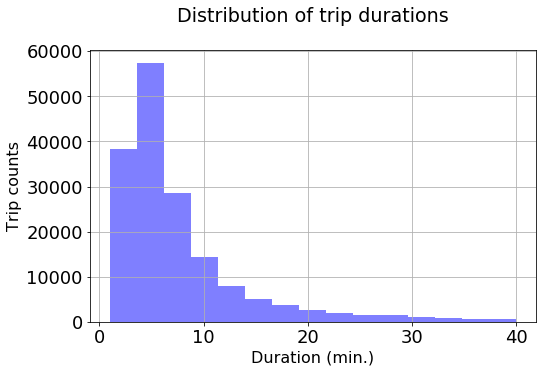

In [30]:
			
# Collect all trips shorter than 3 hours
duration_mins = trips_data_2019.loc[(trips_data_2019.tripduration / 60 < 40)][['tripduration']]
duration_mins = duration_mins / 60 # In minutes

# Plot the distribution of trip durations
plt.rcParams.update({'font.size': 16})
duration_mins.hist(figsize = (8,5), bins = 15, alpha = 0.5, color = 'blue')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Distribution of trip durations\n')
plt.xlabel('Duration (min.)')
plt.ylabel('Trip counts')


In [31]:
# filter_df = trips_data_2019.loc[(trips_data_2019['start station name'] == "Sip Ave") & (trips_data_2019['start station latitude'] < 40.7308)]['start station latitude']

In [32]:
# group_data_lat2 = trips_data_2019.groupby(['start station name', 'start station latitude']) ['start station latitude'].count()
# print(group_data_lat2)

In [33]:
# group_data_long2 = trips_data_2019.groupby(['start station name', 'start station longitude']) ['start station longitude'].count()
# print(group_data_long2)

In [34]:
# combined_trips_data.to_csv('trip_data/combined_trips_data.csv', sep = ',', header = True, index=False)
trips_data_2019.to_csv('trip_data/CitiBike_TripsData_2019.csv', sep = ',', header = True)